Alejandra Velasco Zárate A01635453

José Antonio Juárez Pacheco A0057218

José Carlos Yamuni Contreras A01740285

Juan Manuel Hernández Solano A00572208

In [1]:
# Importar librerías

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import os
from skimage import io, feature
from skimage.transform import resize
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray, rgb2lab
from skimage import img_as_ubyte
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Dropout
from kerastuner.tuners import RandomSearch
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from tensorflow.keras.datasets import fashion_mnist
import keras_tuner

C:\Users\Alejandra Velasco\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\Alejandra Velasco\AppData\Local\Temp\ipykernel_19744\3351578344.py:23: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Calsificador de imágenes Fashion-MNIST

In [2]:
# Cargar conjunto de datos de fashion
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Normalización de imágenes
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0

In [4]:
x_train, y_train = x_train[:20000], y_train[:20000]

# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Support Vector Machine base lineal

In [5]:
# Definir el modelo SVM lineal
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Entrenar el modelo
model.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
recall_per_class = recall_score(y_test, y_pred, average=None)

print(f'Exactitud del modelo: {accuracy:.4f}')
print('Sensibilidad (Recall) por clase:')
for i, recall in enumerate(recall_per_class):
    print(f'Clase {i}: {recall:.4f}')

Exactitud del modelo: 0.8145
Sensibilidad (Recall) por clase:
Clase 0: 0.8000
Clase 1: 0.9640
Clase 2: 0.7200
Clase 3: 0.8010
Clase 4: 0.6870
Clase 5: 0.9240
Clase 6: 0.5000
Clase 7: 0.8990
Clase 8: 0.9280
Clase 9: 0.9220


## Support Vector Machine base radial

In [6]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [7]:
# Entrenar el modelo
model.fit(x_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(x_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
recall_per_class = recall_score(y_test, y_pred, average=None)

print(f'Exactitud del modelo: {accuracy:.4f}')
print('Sensibilidad (Recall) por clase:')
for i, recall in enumerate(recall_per_class):
    print(f'Clase {i}: {recall:.4f}')

Exactitud del modelo: 0.8628
Sensibilidad (Recall) por clase:
Clase 0: 0.8060
Clase 1: 0.9530
Clase 2: 0.7880
Clase 3: 0.8910
Clase 4: 0.7910
Clase 5: 0.9370
Clase 6: 0.6230
Clase 7: 0.9290
Clase 8: 0.9670
Clase 9: 0.9430


## Perceptrón multicapa
### Red Neuronal con cross validation y hiperparámetros óptimos

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_test.shape

(10000, 28, 28)

In [9]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

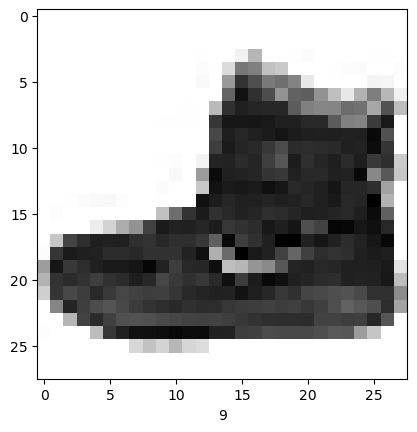

In [10]:
plt.imshow(x_train[0], cmap = 'binary')
plt.xlabel(y_train[0])
plt.show()

In [11]:
def create_model(hp):
    
    num_hidden_layers = 1
    num_units = 8
    dropout_rate = 0.1
    learning_rate = 0.001
    
    if hp:
        num_hidden_layers = hp.Choice('num_hidden_layers', values=[2, 3, 4])
        num_units = hp.Choice('num_units', values=[16, 32, 64])
    
    model=tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
    model.add(tf.keras.layers.Lambda(lambda x: x/255.))
    
    for _ in range(0, num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_units, activation = 'relu'))
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

    model.compile(
        loss = 'sparse_categorical_crossentropy', 
        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
        metrics =['accuracy']
    )
    
    return model

    

In [12]:
create_model(None).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6370 (24.88 KB)
Trainable params: 6370 (24.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
gridtuner = keras_tuner.GridSearch(
    create_model,
    objective='val_accuracy',
    directory = 'grid_search',
    project_name = 'fashionmnist_mlp', 
    overwrite = True
)

In [14]:
gridtuner.search_space_summary()

Search space summary
Default search space size: 2
num_hidden_layers (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4], 'ordered': True}
num_units (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': True}


In [15]:
gridtuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs = 5, verbose = False)

In [16]:
gridtuner.results_summary(3)

Results summary
Results in grid_search\fashionmnist_mlp
Showing 3 best trials
Objective(name="val_accuracy", direction="max")

Trial 0002 summary
Hyperparameters:
num_hidden_layers: 2
num_units: 64
Score: 0.8738999962806702

Trial 0005 summary
Hyperparameters:
num_hidden_layers: 3
num_units: 64
Score: 0.8668000102043152

Trial 0008 summary
Hyperparameters:
num_hidden_layers: 4
num_units: 64
Score: 0.8618999719619751


In [17]:
model = gridtuner.get_best_models(num_models = 1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [18]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20, batch_size = 128, verbose = False)

In [19]:
from sklearn.metrics import accuracy_score, recall_score

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)

print(f'Accuracy: {accuracy}')

class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

labels = list(class_names.keys())
recall_per_class = recall_score(y_test, y_pred_classes, labels=labels, average=None)

for label, recall in zip(labels, recall_per_class):
    class_name = class_names[label]
    print(f'Recall para la clase {class_name}: {recall}')

313/313 [==============================] - 0s 873us/step
Accuracy: 0.8849
Recall para la clase T-shirt/top: 0.879
Recall para la clase Trouser: 0.976
Recall para la clase Pullover: 0.818
Recall para la clase Dress: 0.875
Recall para la clase Coat: 0.783
Recall para la clase Sandal: 0.965
Recall para la clase Shirt: 0.667
Recall para la clase Sneaker: 0.97
Recall para la clase Bag: 0.972
Recall para la clase Ankle boot: 0.944


El clasificador con peor exactitud fue el de Support Vector Machine de base lineal, una exactitud de $0.81$, lo cual no es malo pero podría mejorar. Support vector machine de base radial con una exactitud de $0.86$. Se puede observar que un clasificador que no sea lineal clasifica mejor que uno lineal. Finalmente, se concluye que el mejor clasificador para imágenes de fashion es la red perceptrón multicapa, ya que tuvo una exactitud de $0.88$. Además de que en la mayoría de las clases la sensibilidad fue mejor en el modelo perceptron. Con este ejemplo, se puede argumentar y validar que las redes neuronales son los mejores clasificadores al momento de hablar de datos no estructurados como lo son

# Clasificador de imágenes satelitales

In [20]:
# Establecer el ancho y altura de las imágenes después del redimensionamiento
img_width, img_height = 128, 128

# Directorio raíz donde se encuentran las carpetas de clases
root_dir = "data"

# Lista de subdirectorios (cada subdirectorio es una clase)
class_folders = [folder for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))]

# Listas para almacenar características y etiquetas
all_features = []
all_labels = []

# Función para extraer características de una imagen
def extract_features(image):
    # Redimensionar la imagen a 128x128
    rgb_resized = resize(image, (img_height, img_width), anti_aliasing=True)

    # Convertir a escala de grises
    gray_resized = img_as_ubyte(rgb2gray(rgb_resized))

    # Histogramas de color
    nbins = 16
    rh = np.histogram(rgb_resized[:,:,0].flatten(), nbins, density=True)
    gh = np.histogram(rgb_resized[:,:,1].flatten(), nbins, density=True)
    bh = np.histogram(rgb_resized[:,:,2].flatten(), nbins, density=True)
    hist_descriptor = np.concatenate((rh[0], gh[0], bh[0]))

    # Descriptores de textura usando GLCM
    glcm = graycomatrix(gray_resized, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4])
    texture_desc = [graycoprops(glcm, 'dissimilarity')[0, 0], graycoprops(glcm, 'homogeneity')[0, 0], graycoprops(glcm, 'energy')[0, 0], graycoprops(glcm, 'correlation')[0, 0]]

    return hist_descriptor, texture_desc

# Iterar sobre cada carpeta de clase
for class_folder in class_folders:
    class_path = os.path.join(root_dir, class_folder)

    # Iterar sobre cada archivo de imagen en la carpeta de clase
    for filename in os.listdir(class_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Asegurarse de que el archivo sea una imagen
            image_path = os.path.join(class_path, filename)

            # Cargar la imagen
            rgb = io.imread(image_path)

            # Extraer características
            hist_descriptor, texture_desc = extract_features(rgb)

            # Almacenar características y etiquetas
            all_features.append(np.concatenate([hist_descriptor, texture_desc]))
            all_labels.append(class_folder)

# Convertir a matrices numpy
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Verificar las dimensiones de las matrices resultantes
print("Dimensiones de características:", all_features.shape)
print("Dimensiones de etiquetas:", all_labels.shape)

Dimensiones de características: (2016, 52)
Dimensiones de etiquetas: (2016,)


In [21]:
all_features[6]

array([2.36250858e+00, 7.03765372e+00, 6.68000013e+00, 4.16502568e+00,
       2.08465021e+00, 4.17500008e-01, 2.82133111e-01, 1.52465873e-01,
       6.12713322e-02, 5.69965881e-02, 1.42491470e-02, 9.97440292e-03,
       8.54948822e-03, 1.42491470e-03, 4.27474411e-03, 7.12457351e-03,
       1.97112361e+00, 6.93053957e+00, 6.62452694e+00, 4.17067918e+00,
       2.48976473e+00, 6.16335298e-01, 3.37619569e-01, 2.14065173e-01,
       1.06314247e-01, 3.01702593e-02, 1.58034692e-02, 8.62007409e-03,
       5.74671606e-03, 5.74671606e-03, 2.87335803e-03, 8.62007409e-03,
       1.31359762e+00, 6.28989671e+00, 8.66415454e+00, 4.92459365e+00,
       1.05087810e+00, 3.43771293e-01, 2.04026865e-01, 3.91284399e-02,
       1.95642199e-02, 1.39744428e-02, 9.78210997e-03, 5.58977712e-03,
       5.58977712e-03, 0.00000000e+00, 5.58977712e-03, 5.58977712e-03,
       4.76460874e+00, 2.47433665e-01, 4.24899570e-02, 8.53668553e-01])

In [22]:
all_labels[1]

'Agua'

In [23]:
# Normalizar las características
all_features_standard = (all_features - all_features.min()) / (all_features.max() - all_features.min())

# Codificar etiquetas
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Codificar etiquetas en formato one-hot
all_labels_onehot = to_categorical(all_labels_encoded, num_classes=len(label_encoder.classes_))


## SVM

In [24]:
def SVM_cross_validation(x,y,n,tipo,a, c):
    n_folds = n
    kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

    acc = 0
    recall = np.array([0., 0., 0.])
    precision = np.array([0., 0., 0.])

    cv_y_test = []
    cv_y_pred = []
    
    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        clf_cv = SVC(C = c, kernel = tipo)
        clf_cv.fit(x_train, y_train)
        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        
        # Concatenate results of evaluation
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
        
        # Model performance
        if a == True:
            print(classification_report(y_test, y_pred))

    # Model performance
    print("Resultados del clasificador:\n\n")
    # Crea la tabla
    report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), output_dict=True)
    accuracy = report['accuracy']
    table = PrettyTable()
    table.field_names = ['Clase', 'Precisión', 'Recall', 'Puntaje F1', 'Soporte']

    # Agrega las filas a la tabla
    for class_label, metrics in report.items():
        if class_label != 'accuracy':
            precision = metrics['precision']
            recall = metrics['recall']
            f1_score = metrics['f1-score']
            support = metrics['support']
            table.add_row([class_label, precision, recall, f1_score, support])

    # Imprime el resultado
    print(table)
    print("\nAccuracy = ", accuracy)

### Support vector machine lineal

In [25]:
SVM_cross_validation(all_features_standard,all_labels_encoded,5,"linear",True, 2)

              precision    recall  f1-score   support

           0       0.85      0.75      0.79        67
           1       0.69      0.79      0.74        67
           2       0.57      0.96      0.71        68
           3       0.76      0.38      0.51        66
           4       0.83      0.81      0.82        67
           5       0.47      0.38      0.42        69

    accuracy                           0.68       404
   macro avg       0.69      0.68      0.66       404
weighted avg       0.69      0.68      0.66       404

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        67
           1       0.74      0.82      0.78        67
           2       0.48      0.87      0.62        67
           3       0.82      0.21      0.33        67
           4       0.75      0.93      0.83        67
           5       0.42      0.31      0.36        68

    accuracy                           0.66       403
   macro avg       0.69

El clasificador de SVM Lineal tiene una exactitud de $0.655$, lo cual es un valor inaceptable al referirse a un clasificador. 

### Support vector machine base radial

In [26]:
SVM_cross_validation(all_features_standard,all_labels_encoded,5,"rbf",True, 2)

              precision    recall  f1-score   support

           0       0.97      0.87      0.91        67
           1       0.90      0.90      0.90        67
           2       0.76      0.88      0.82        68
           3       0.75      0.71      0.73        66
           4       0.87      0.93      0.90        67
           5       0.81      0.75      0.78        69

    accuracy                           0.84       404
   macro avg       0.84      0.84      0.84       404
weighted avg       0.84      0.84      0.84       404

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        67
           1       0.86      0.88      0.87        67
           2       0.75      0.85      0.80        67
           3       0.75      0.61      0.67        67
           4       0.84      0.84      0.84        67
           5       0.76      0.81      0.79        68

    accuracy                           0.81       403
   macro avg       0.81

Se puede observar que un clasificador de SVM con base radial mejora la exactitud del clasificador por casi $17\%$ lo cual es bastante. Una exactitud de $0.81$ es buena, sin embargo se podría mejorar. 

## Perceptrón multicapa
### Red Neuronal sin cross validation ni hiperparámetros óptimos

In [27]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(all_features_standard, all_labels_onehot, test_size=0.2, random_state=42)

# Crear el modelo con Dropout
clf = Sequential()
clf.add(Dense(60, activation='relu', input_shape=(X_train.shape[1],)))
clf.add(Dropout(0.3))  # Agregar Dropout con una tasa del 30%
clf.add(Dense(60, activation='relu'))
clf.add(Dropout(0.3))  # Agregar Dropout con una tasa del 30%
clf.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilar modelo
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ajustar modelo
clf.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose=False)

# Evaluar modelo
test_loss, test_acc = clf.evaluate(X_test, y_test, verbose=False)
print(f'\nExactitud en conjunto de prueba sin crossvalidation e hiperparámetros óptimos: {test_acc}')



Exactitud en conjunto de prueba sin crossvalidation e hiperparámetros óptimos: 0.7846534848213196


Una red neuronal sin validación cruzada ni hiperparámetros óptimos tiene peor comportamiento que un clasificador SVM de base radial, por $3\%$, un porcentaje menor pero significativo para un clasificador.

### Red Neuronal con cross validation e hiperparámetros óptimos

In [28]:
# Dividir los datos en características y etiquetas
X = all_features_standard
y = all_labels_onehot

In [29]:
# Función para crear el modelo 
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.7, step=0.1)))
    
    for i in range(hp.Int('hidden_layers', min_value=1, max_value=10)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=64, max_value=256, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.2, max_value=0.7, step=0.1)))

    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Configurar la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar el sintonizador (RandomSearch en este caso)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=7,  # Número de combinaciones de hiperparámetros a probar
    directory='my_tuning_dir',  # Carpeta para guardar los resultados del sintonizador
    project_name='my_project'
)

# Iterar sobre los pliegues de la validación cruzada
for train_index, test_index in cv.split(X, np.argmax(y, axis=1)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Ejecutar la búsqueda de hiperparámetros en este pliegue
    tuner.search(X_train, y_train, epochs=200, batch_size=5, validation_data=(X_test, y_test), verbose = False)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]


# Evaluar el mejor modelo en el conjunto de prueba
test_loss, test_acc = best_model.evaluate(X_test, y_test)

# Predecir las clases
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el informe de clasificación
class_names = label_encoder.classes_
classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred_classes, target_names=class_names)

# Mostrar el informe de clasificación
print("Classification Report:")
print(classification_rep)

# Mostrar la precisión general y la precisión por clase
print(f'Accuracy on test data with cross-validation: {test_acc}')


Reloading Tuner from my_tuning_dir\my_project\tuner0.json
13/13 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

        Agua       0.99      0.99      0.99        67
      Bosque       0.96      0.97      0.96        67
      Ciudad       0.94      0.97      0.96        67
     Cultivo       0.84      0.96      0.90        67
    Desierto       1.00      0.89      0.94        66
     Montaña       1.00      0.93      0.96        69

    accuracy                           0.95       403
   macro avg       0.95      0.95      0.95       403
weighted avg       0.95      0.95      0.95       403

Accuracy on test data with cross-validation: 0.9503722190856934


Una red neuronal con hiperparámetros óptimos y validación cruzada mejora por mucho al momento de clasificar imágenes satelitales. Su exactitud es de $0.95$, supera al SVM base radial por $14\%$. Una exactitud de $95\%$ es excelente para un clasificador y es un modelo que sin duda se puede utilizar para seguir clasificando biomasas de México con fotos satelitales. Se comprueba nuevamente que una red neuronal es mucho mejor que cualquier clasificador clásico. 

# Clasificadores de imágenes de verduras

In [35]:
# Establecer el ancho y altura de las imágenes después del redimensionamiento
img_width, img_height = 64, 64

# Directorio raíz donde se encuentran las carpetas de clases
root_dir = "data_verduras"

# Lista de subdirectorios (cada subdirectorio es una clase)
class_folders = [folder for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))]

# Listas para almacenar características y etiquetas
all_features = []
all_labels = []

# Función para extraer características de una imagen
def extract_features(image):
    # Redimensionar la imagen a 128x128
    rgb_resized = resize(image, (img_height, img_width), anti_aliasing=True)

    # Convertir a escala de grises
    gray_resized = img_as_ubyte(rgb2gray(rgb_resized))

    # Histogramas de color
    nbins = 8
    rh = np.histogram(rgb_resized[:,:,0].flatten(), nbins, density=True)
    gh = np.histogram(rgb_resized[:,:,1].flatten(), nbins, density=True)
    bh = np.histogram(rgb_resized[:,:,2].flatten(), nbins, density=True)
    hist_descriptor = np.concatenate((rh[0], gh[0], bh[0]))

    # Descriptores de textura usando GLCM
    glcm = graycomatrix(gray_resized, distances=[5], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4])
    texture_desc = [graycoprops(glcm, 'dissimilarity')[0, 0], graycoprops(glcm, 'homogeneity')[0, 0], graycoprops(glcm, 'energy')[0, 0], graycoprops(glcm, 'correlation')[0, 0]]

    return hist_descriptor, texture_desc

# Iterar sobre cada carpeta de clase
for class_folder in class_folders:
    class_path = os.path.join(root_dir, class_folder)

    # Iterar sobre cada archivo de imagen en la carpeta de clase
    for filename in os.listdir(class_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Asegurarse de que el archivo sea una imagen
            image_path = os.path.join(class_path, filename)

            # Cargar la imagen
            rgb = io.imread(image_path)

            # Extraer características
            hist_descriptor, texture_desc = extract_features(rgb)

            # Almacenar características y etiquetas
            all_features.append(np.concatenate([hist_descriptor, texture_desc]))
            all_labels.append(class_folder)

# Convertir a matrices numpy
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Verificar las dimensiones de las matrices resultantes
print("Dimensiones de características:", all_features.shape)
print("Dimensiones de etiquetas:", all_labels.shape)

Dimensiones de características: (2528, 28)
Dimensiones de etiquetas: (2528,)


In [37]:
all_features[1]

array([ 0.47700384,  2.41829852,  4.06007916,  0.59680945,  0.04880969,
        0.05546556,  0.49475282,  0.93625869,  0.7017579 ,  3.08305636,
        4.13101482,  0.0654974 ,  0.05146225,  0.09590691,  0.64561727,
        0.80702158,  0.51769923,  2.41592974,  4.06366062,  2.50499627,
        0.08906653,  0.31173287,  0.96581523,  0.53161587, 16.91075212,
        0.13365381,  0.02664937,  0.78494875])

In [38]:
all_labels[1]

'Cebolla'

In [39]:
# Normalizar las características
all_features_standard = (all_features - all_features.min()) / (all_features.max() - all_features.min())

# Codificar etiquetas
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Codificar etiquetas en formato one-hot
all_labels_onehot = to_categorical(all_labels_encoded, num_classes=len(label_encoder.classes_))

## Suport Vector Machine base lineal

In [40]:
SVM_cross_validation(all_features_standard,all_labels_encoded,5,"linear",True, 1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       0.93      0.85      0.89       100
           2       0.91      0.96      0.94       105
           3       0.85      0.87      0.86       100
           4       1.00      1.00      1.00       100

    accuracy                           0.94       506
   macro avg       0.94      0.94      0.94       506
weighted avg       0.94      0.94      0.94       506

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.94      0.89      0.91       101
           2       0.93      1.00      0.96       105
           3       0.93      0.92      0.92       100
           4       1.00      0.98      0.99       100

    accuracy                           0.96       506
   macro avg       0.96      0.96      0.96       506
weighted avg       0.96      0.96      0.96       506

              precisio

## Support Vector Machine base radial

In [41]:
SVM_cross_validation(all_features_standard,all_labels_encoded,5,"rbf",True, 1)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           1       1.00      0.98      0.99       100
           2       1.00      1.00      1.00       105
           3       0.97      1.00      0.99       100
           4       1.00      1.00      1.00       100

    accuracy                           0.99       506
   macro avg       0.99      0.99      0.99       506
weighted avg       0.99      0.99      0.99       506

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.99      0.94      0.96       101
           2       1.00      1.00      1.00       105
           3       0.94      0.98      0.96       100
           4       1.00      1.00      1.00       100

    accuracy                           0.98       506
   macro avg       0.98      0.98      0.98       506
weighted avg       0.98      0.98      0.98       506

              precisio

## Perceptron multicapa

### Red Neuronal sin cross validation ni hiperparámetros óptimos

In [42]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(all_features_standard, all_labels_onehot, test_size=0.2, random_state=42)

# Crear el modelo con Dropout
clf = Sequential()
clf.add(Dense(60, activation='relu', input_shape=(X_train.shape[1],)))
clf.add(Dropout(0.3))  # Agregar Dropout con una tasa del 30%
clf.add(Dense(60, activation='relu'))
clf.add(Dropout(0.3))  # Agregar Dropout con una tasa del 30%
clf.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compilar modelo
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ajustar modelo
clf.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose=False)

# Evaluar modelo
test_loss, test_acc = clf.evaluate(X_test, y_test, verbose=False)
print(f'\nExactitud en conjunto de prueba sin crossvalidation e hiperparámetros óptimos: {test_acc}')



Exactitud en conjunto de prueba sin crossvalidation e hiperparámetros óptimos: 0.9960474371910095


### Red Neuronal con cross validation y hiperparámetros óptimos

In [43]:
# Dividir los datos en características y etiquetas
X = all_features_standard
y = all_labels_onehot

In [44]:
# Función para crear el modelo 
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.7, step=0.1)))
    
    for i in range(hp.Int('hidden_layers', min_value=1, max_value=10)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=64, max_value=256, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.2, max_value=0.7, step=0.1)))

    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Configurar la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar el sintonizador (RandomSearch en este caso)
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=7,  # Número de combinaciones de hiperparámetros a probar
    directory='my_tuning_dir1',  # Carpeta para guardar los resultados del sintonizador
    project_name='my_project1'
)

# Iterar sobre los pliegues de la validación cruzada
for train_index, test_index in cv.split(X, np.argmax(y, axis=1)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Ejecutar la búsqueda de hiperparámetros en este pliegue
    tuner.search(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test), verbose = False)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]


# Evaluar el mejor modelo en el conjunto de prueba
test_loss, test_acc = best_model.evaluate(X_test, y_test)

# Predecir las clases
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular el informe de clasificación
class_names = label_encoder.classes_
classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred_classes, target_names=class_names)

# Mostrar el informe de clasificación
print("Classification Report:")
print(classification_rep)

# Mostrar la precisión general y la precisión por clase
print(f'Accuracy on test data with cross-validation: {test_acc}')

16/16 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

     Cebolla       1.00      1.00      1.00       100
     Chayote       1.00      0.97      0.98       100
    Jitomate       1.00      1.00      1.00       105
      Pepino       0.97      1.00      0.99       100
   Zanahoria       1.00      1.00      1.00       100

    accuracy                           0.99       505
   macro avg       0.99      0.99      0.99       505
weighted avg       0.99      0.99      0.99       505

Accuracy on test data with cross-validation: 0.9940593838691711


Por la naturaleza del conjunto de imágenes tanto los clasificadores SVM como el perceptrón tuvieron un excelente comportamiento. Pero el mejor modelo dentro de todo es la red neuronal con una exactitud de $99.41\%$, lo cual es asombroso. Se podría pensar que el modela esta sobreajustando, pero las excelentes clasificaciones se deben a un buen conjunto de imágenes. Este último conjunto de imágenes, comprueban nuevamente que para clasificar imágenes el mejor clasificador es el perceptrón multicapa.